#Spaceship Titanic 🚀

## Bienvenido al año 2912

Tus habilidades en ciencia de datos son clave para resolver un misterio cósmico. Hemos recibido una transmisión desde un sistema estelar a cuatro años luz de distancia... y las noticias no son buenas.


La **Nave Espacial Titanic** era un transatlántico interestelar lanzado hace apenas un mes. Con casi **13.000 pasajeros a bordo**, emprendió su viaje inaugural transportando emigrantes desde nuestro sistema solar hacia **tres exoplanetas habitables** que orbitan estrellas cercanas.


Pero, mientras rodeaba **Alfa Centauri** rumbo a su primer destino —el abrasador **55 Cancri E**—, la desprevenida nave chocó con una **anomalía del espacio-tiempo** oculta dentro de una nube de polvo.


Lamentablemente, tuvo un destino similar al de su homónima de hace mil años. Aunque la nave permaneció intacta, **casi la mitad de los pasajeros fueron transportados a una dimensión alternativa**.


🧠 ¿Podrás ayudarnos a resolver lo que ha ocurrido?

<img src= "https://i.ibb.co/cXMj2qBc/Chat-GPT-Image-12-jul-2025-18-42-11.png" width = 400>


## Preprocessing Exercise

### Pasos sugeridos

1. **Reconoce las columnas y tipos**
   - Usa `.info()` y `.head()` para familiarizarte con los datos.
   - Identifica el tipo de cada columna: ¿numérica, texto, categórica?

2. **Encuentra y estudia los valores nulos**
   - ¿Qué columnas tienen valores nulos? ¿Cuántos son y en qué porcentaje?
   - ¿Tiene sentido que haya nulos en esas columnas?  

3. **Trata los valores nulos**
   - ¿Vas a eliminar filas, columnas, o imputar (rellenar) los nulos?
   - Si imputas: ¿qué método usarás según el tipo de variable (media, mediana, moda, valor especial)?  
     *(Ejemplo: para una columna de cabinas, quizás “SinCabina”; para una edad, la media;....)*

4. **Detecta y trata los outliers**
   - Elige una columna numérica interesante (por ejemplo, “RoomService”, “FoodCourt”, “Age”).
   - Visualiza su distribución con histogramas y boxplots.
   - Calcula cuartiles y rango intercuartílico (IQR/RIC).
   - Decide: ¿Eliminar outliers? ¿Rellenar? ¿Dejarlos si tienen sentido?
   - *Explica tu decisión.*


#1. Reconoce las columnas y tipos

1. Usa .info() y .head() para familiarizarte con los datos.
2. Identifica el tipo de cada columna: ¿numérica, texto, categórica?



In [2]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#1
df_titanic=pd.read_csv('/content/drive/MyDrive/data/titanic_spaceship.csv')
df_titanic.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
#2
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


#2. Encuentra y estudia los valores nulos
1. ¿Qué columnas tienen valores nulos?¿Cuántos son y en que porcentaje?
2. ¿Tiene sentido que haya nulos en esas columnas?

In [5]:
#1
df_null=df_titanic.isnull().sum()
df_null

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [7]:
#1
porcentaje = df_null/len(df_titanic)*100
porcentaje

,0
PassengerId,0.000000
HomePlanet,2.312205
CryoSleep,2.496261
Cabin,2.289198
Destination,2.093639
Age,2.059128
VIP,2.335212
RoomService,2.082135
FoodCourt,2.105142
ShoppingMall,2.392730


2.



En el caso de `'HomePlanet','Destination', y 'Cabin'` puede que esta información no sea relevante para el pasajero o no estaba disponible

Para el caso de los servicios (`Food,Court, RoomService, ShoppingMall, Spa, VRDeck`) tiene sentido que existan datos nulos porque puede que los pasajeros no utilizen ese servicio

Para la columna `Age` puede haber pasajeros sin edad registrada (por olvido, privacidad, etc.).

Para las columnas `Name y Transported`, no deberian haber valores nulos ya que son clave para el registro y objetivo del modelo

#3. Trata los valores nulos

1. ¿Vas a eliminar filas, columnas, o imputar (rellenar) los nulos?
2. Si imputas: ¿qué método usarás según el tipo de variable (media, mediana, moda, valor especial)?  (Ejemplo: para una columna de cabinas, quizás “SinCabina”; para una edad, la media;....)


In [11]:
#Llenamos los valores nulos con la moda ya que tenemos un porcentaje pequeño
for col in ['HomePlanet', 'Destination']:
  moda=df_titanic[col].mode(0)
  df_titanic[col] = df_titanic[col].fillna(moda)

for col in ['CryoSleep', 'VIP']:
  moda=df_titanic[col].mode()[0]
  df_titanic[col]=df_titanic[col].fillna(moda)

df_titanic.head()

/tmp/ipython-input-1911811966.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_titanic[col]=df_titanic[col].fillna(moda)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#4. Detecta y trata los outliers

1. Elige una columna numérica interesante (por ejemplo, “RoomService”, “FoodCourt”, “Age”).
2. Visualiza su distribución con histogramas y boxplots.
3. Calcula cuartiles y rango intercuartílico (IQR/RIC).
4.  Decide: ¿Eliminar outliers? ¿Rellenar? ¿Dejarlos si tienen sentido?
5. Explica tu decisión.



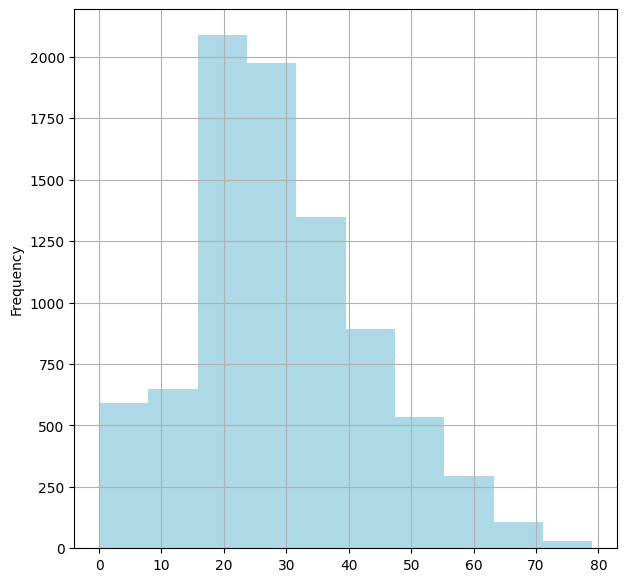

In [13]:
#1-2 Representación de la columna Age

df_titanic['Age'].plot(kind='hist', color='lightblue', figsize=(7,7), grid=True);

In [18]:
q1 = df_titanic['Age'].quantile(0.25)
q3 = df_titanic['Age'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_iqr = df_titanic[(df_titanic['Age'] < lower_bound) | (df_titanic['Age'] > upper_bound)]
outliers_iqr['Age'].values

array([67., 67., 79., 68., 74., 79., 67., 67., 71., 74., 71., 75., 67.,
       67., 70., 76., 78., 70., 67., 73., 67., 68., 75., 67., 70., 69.,
       69., 69., 78., 71., 72., 71., 68., 70., 69., 73., 71., 74., 77.,
       68., 73., 72., 74., 74., 70., 77., 67., 73., 68., 75., 68., 79.,
       70., 72., 68., 70., 68., 78., 68., 68., 68., 73., 70., 71., 68.,
       67., 67., 75., 69., 73., 69., 71., 72., 67., 76., 73., 70.])

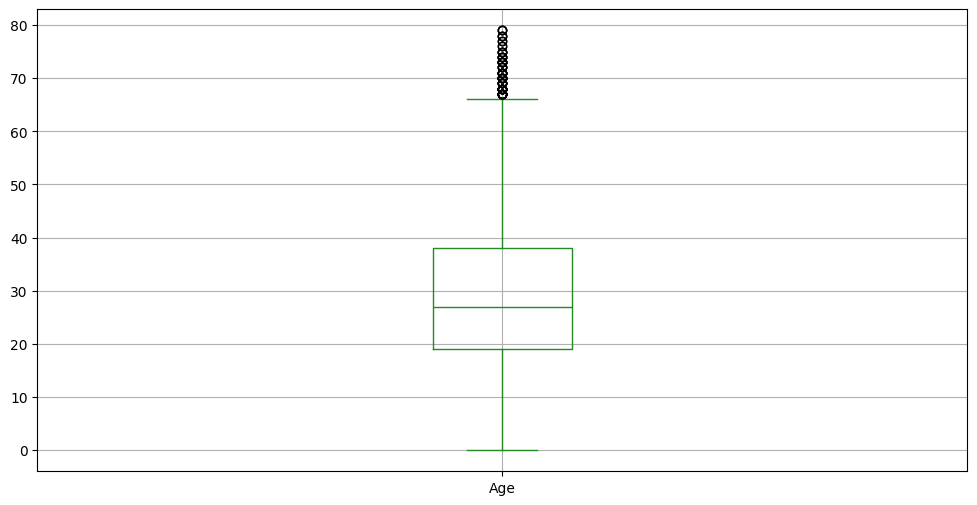

In [19]:
df_titanic['Age'].plot(kind='box', color='forestgreen', figsize=(12, 6), grid=True);

In [20]:
mediana=df_titanic['Age'].median()
df_titanic['Age'] = df_titanic['Age'].fillna(mediana)
df_titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


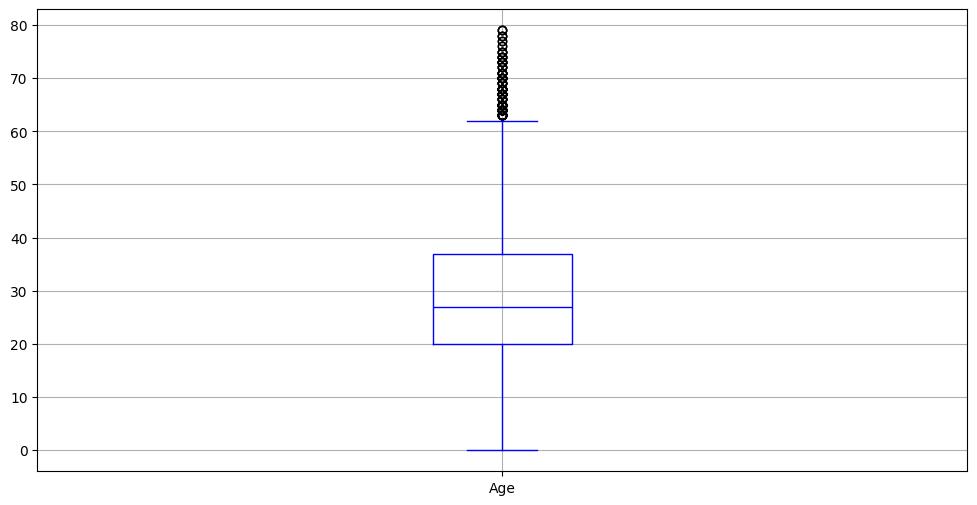

In [21]:
df_titanic['Age'].plot(kind='box', color='blue', figsize=(12, 6), grid=True);